## Prácticas Naive Bayes y KNN (ejercicio 2)

#### 1. Tomando como base este [tutorial](https://colab.research.google.com/drive/1zFIOfrceEaFkhQOEOkMWroBmNV1HAMVS?usp=drive_link),  crea un modelo de clasificación usando KNN con los mismos datos sintéticos. Para la elección de los mejores hiperparámetros usa un sistema de [validación cruzada](https://educacionadistancia.juntadeandalucia.es/centros/cordoba/pluginfile.php/406946/mod_resource/content/1/M2_SAA_S10%20-%20Validaci%C3%B3n.pdf).

#### **2. Usando los datos almacenados en data2.csv, crea un modelo de clasificación usando los modelos de NaiveBayes mostrados en el [vídeo 5](https://vimeo.com/600140324). Indicad qué modelo da mejores resultados. Os toca investigar cómo cargar un archivo csv desde Google Collab.**

#### 3. En este [enlace](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) puedes descargar un dataset que recoge diferentes características de vino rojo portugués "Vinho Verde" y la calidad del mismo. Crea un modelo de clasificación usando NaiveBayes (GaussianNB) y KNN.

#### 4. Plantea el problema anterior con un modelo de regresión usando KNN. En el [vídeo 7](https://vimeo.com/600141357) hay un ejemplo de regresión con KNN.

#### author: Virginia Ordoño Bernier - date: december 2023


#### 1. Carga datos

In [122]:
# from google.colab import files
import io
import pandas as pd
import numpy as np

# Carga de datos
# data= '/content/drive/MyDrive/AI/SAA/data/data2.csv'

data = pd.read_csv("data/data2.csv")
data.head()

# def upload_files ():
#   uploaded = files.upload()
#   for fn in uploaded.keys():
#     print('User uploaded file "{name}" with length {length} bytes'.format(
#         name=fn, length=len(uploaded[fn])))
#     df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
#     return df

# data = upload_files()
# data.head()

,Feature_1,Feature_2,Label
0,0.496714,-0.138264,0.0
1,0.647689,1.523030,0.0
2,-0.234153,-0.234137,0.0
3,1.579213,0.767435,0.0
4,-0.469474,0.542560,0.0


#### 2. Preprocesamiento de datos

In [123]:
from sklearn.model_selection import train_test_split

# Separar características (X) y etiquetas (y)
X = data[['Feature_1', 'Feature_2']]
y = data['Label']

# Dividir los datos en conjuntos de entrenamiento y prueba (60% entrenamiento, 40% test)
# Random-state para obtener siempre la misma división de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### 3. Clasificación con Naive Bayes

- Calcula las probabilidades de cada factor o características según cada clase. La clase con más probabildidad, será la ganadora.
- Asume que las características son estadísticamente independientes.
- Funciona bien con clasificaciones sencillas.

##### 3.1. Tipos de distribución según clasificadores 

- *Gaussian Naive Bayes*. Variables de entradas características numéricas continuas.
- *Multinomial Naive Bayes*. Datos que provienen de recuentos.
- *Complement Naive Bayes*. Extensión del Multinomial. Clasificación no balanceada, se usa cuando una de las clases se produce de manera mucho más frecuente que las demás.
- *Bernouilli Naive Bayes*. Con datos binarios.
- *Categorical Naive Bayes*. Si todas las variables con categóricas

##### 3.2. Selección del método 

In [124]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

model_names = ["GaussianNB", 'BernouilliNB']
classifiers = [GaussianNB(), BernoulliNB()]

for model_name, clf in zip(model_names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    # Calcular la matriz de confusión
    cm = np.round(confusion_matrix(y_test, y_pred))
    
    # Imprimir resultados
    print(f"Modelo {model_name} => Precisión = {score:.2f}")

Modelo GaussianNB => Precisión = 0.99
Modelo BernouilliNB => Precisión = 0.81


##### 3.3. Evaluación del método seleccionado con la Matriz de Confusión 

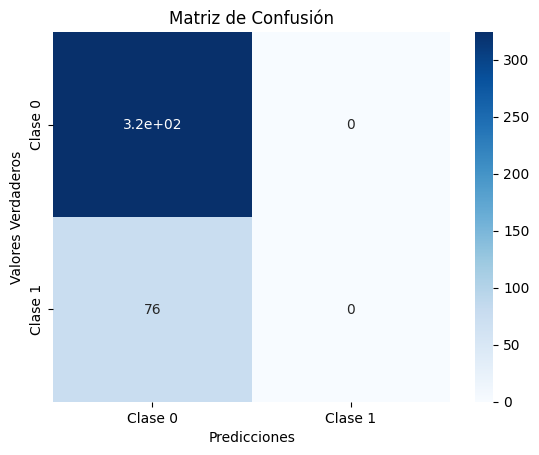

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = np.round(confusion_matrix(y_test, y_pred))
cm

classes = ('Clase 0', 'Clase 1')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()